In [18]:
import torch
from torch import nn
from torch.nn import functional as f
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from nn_utils import train, test

In [3]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [4]:
batch_size = 8

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

device = "cuda" if torch.cuda.is_available() else "cpu"

In [5]:
class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_relu_stack = nn.Sequential(
            nn.Conv2d(1, 6, 5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2))

        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10)
        )
    def forward(self, x):
        x = self.conv_relu_stack(x)
        print(x.shape)
        x = self.flatten(x)

        logits = self.linear_relu_stack(x)
        return logits



In [6]:
# We create our model by instantiating the NeuralNetwork class and immediately move it to the GPU
model = LeNet5().to(device)
print(model)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

LeNet5(
  (conv_relu_stack): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [7]:
epochs = 7
train_losses = []
test_losses = []
for t in tqdm(range(epochs)):
    train_loss = train(train_dataloader, model, loss_fn, optimizer, 10000, device)
    test_loss = test(t, test_dataloader, model, loss_fn, device)

    train_losses.append(train_loss)
    test_losses.append(test_loss)

print("Done!")

  0%|          | 0/7 [00:00<?, ?it/s]

torch.Size([8, 16, 5, 5])
8/60000 : current_loss = 2.338620185852051
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5,

 14%|█▍        | 1/7 [00:29<02:57, 29.54s/it]

torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
End of epoch 1
 Accuracy: 66.27%, Average loss: 0.9011

torch.Size([8, 16, 5, 5])
8/60000 : current_loss = 1.4389744997024536
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 1

 29%|██▊       | 2/7 [00:59<02:27, 29.57s/it]

torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([

 43%|████▎     | 3/7 [01:29<01:59, 29.77s/it]

torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([

 57%|█████▋    | 4/7 [01:58<01:29, 29.72s/it]

torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([

 71%|███████▏  | 5/7 [02:28<00:59, 29.62s/it]

torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([

 86%|████████▌ | 6/7 [02:57<00:29, 29.50s/it]

torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([

100%|██████████| 7/7 [03:26<00:00, 29.51s/it]

torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([8, 16, 5, 5])
torch.Size([

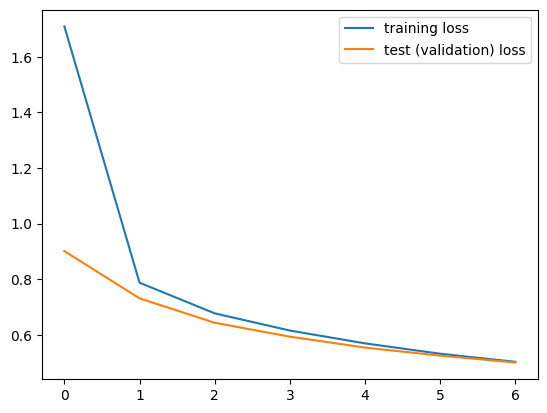

In [10]:
plt.plot(train_losses, label="training loss")
plt.plot(test_losses, label="test (validation) loss")
plt.legend()
plt.show()

In [19]:
torch.save(model.state_dict(), "lenet5_model.pth")

In [20]:
model = LeNet5().to(device)
model.load_state_dict(torch.load("lenet5_model.pth"))

C:\Users\sdey_\AppData\Local\Temp\ipykernel_26772\2301529734.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("lenet5_model.pth"))


<All keys matched successfully>

torch.Size([1, 16, 5, 5])
torch.Size([1, 16, 5, 5])
torch.Size([1, 16, 5, 5])
torch.Size([1, 16, 5, 5])


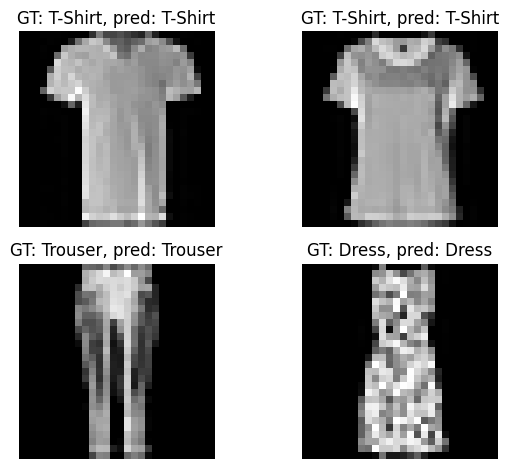

In [23]:
model.eval()
indices = np.random.randint(len(test_data), size=(4))  # pick 4 random images from the test set
f = plt.figure()
for fig_idx, i in enumerate(indices):
    x, y = test_data[i][0], test_data[i][1]
    x = x.unsqueeze(0).to(device)
    pred_vector = model(x)
    pred_value = labels_map[pred_vector.argmax().item()]
    gt_value = labels_map[y]
    plt.subplot(2, 2, fig_idx + 1)
    plt.title(f'GT: {gt_value}, pred: {pred_value}')
    plt.imshow(x.cpu()[0][0], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()
